In [0]:
import tensorflow as tf

In [0]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

5


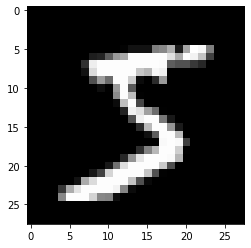

In [78]:
print(y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [0]:
input_shape = [28, 28, 1]

X_train = tf.reshape(X_train, [X_train.shape[0]] + input_shape)
X_test = tf.reshape(X_test, [X_test.shape[0]] + input_shape)

X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [0]:
X_train /= 255
X_test /= 255

In [0]:
def show_distribution(labels):
  # Convert tensor to a list.
  labels_list = list(labels)
  num_classes = len(set(labels_list))
  # Populate distribution list.
  distribution = [labels_list.count(i) for i in range(num_classes)]
  # Visualise.
  y_index = range(num_classes)
  plt.bar(y_index, distribution, align='center')
  plt.xticks(y_index, sorted(set(labels_list)))
  plt.ylabel('Frequency')
  plt.show()

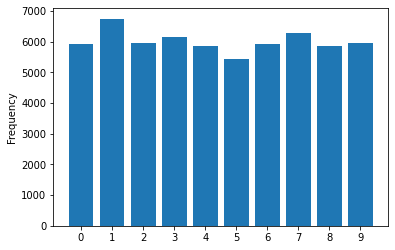

In [82]:
# Show distribution in order to determine metrics.
show_distribution(y_train)

In [0]:
# Reshape so labels can be onehot encoded.
y_train = tf.reshape(y_train, [-1, 1])
y_test = tf.reshape(y_test, [-1, 1])

In [0]:
from sklearn.preprocessing import OneHotEncoder

# Set sparse to False in order to return an array.
encoder = OneHotEncoder(sparse=False)

y_train = tf.convert_to_tensor(encoder.fit_transform(y_train))
y_test = tf.convert_to_tensor(encoder.fit_transform(y_test))

In [0]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    # Declare Layers Individually.
    self.conv = tf.keras.layers.Conv2D(28, kernel_size=(3, 3), input_shape=input_shape)
    self.max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.flatten = tf.keras.layers.Flatten()
    self.fc1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
    self.fc2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

  def call(self, inputs):
    t = self.conv(inputs)
    t = self.max_pool(t)
    t = self.flatten(t)
    t = self.fc1(t)
    return self.fc2(t)

In [0]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [0]:
model = MNISTModel()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [105]:
h = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6514 - accuracy: 0.8098 - val_loss: 1.5916 - val_accuracy: 0.8699
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5866 - accuracy: 0.8741 - val_loss: 1.5855 - val_accuracy: 0.8753
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5374 - accuracy: 0.9239 - val_loss: 1.4880 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4805 - accuracy: 0.9817 - val_loss: 1.4865 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4764 - accuracy: 0.9853 - val_loss: 1.4820 - val_accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4742 - accuracy: 0.9876 - val_loss: 1.4817 - val_accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4725 - accuracy: 0.9890 - val_loss: 1.4815 - val_accuracy:

9


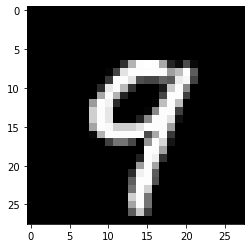

In [106]:
# Let's test this...
plt.imshow(tf.reshape(X_test[12], [28, 28]), cmap='gray')
# Pass through network...
print(np.argmax(model(tf.expand_dims(X_test[12], 0))))